In [1]:
import sys
sys.path.append('../')
from src import optimizer as _optimizer
from src import visualization as _visualization
from src import metrics as _metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns
sns.set(rc={'figure.figsize':(20,8)})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
pd.set_option('display.max_rows', 120)

## Reading / Displaying the Data 

In [2]:
df_products = pd.read_csv('../data/products_features.csv')

In [3]:
df_products = df_products.set_index('code')

In [4]:
df_products.head()

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a,...,unit_liquid_cost_perc_mean,unit_liquid_cost_perc_std,unit_liquid_cost_perc_max,unit_liquid_cost_perc_min,unit_liquid_cost_perc_percentile_50,unit_markup_mean,unit_markup_std,unit_markup_max,unit_markup_min,unit_markup_percentile_50
code,,,,,,,,,,,,,,,,,,,,,
e6762ba2ffbca07ab6cee7551caeaad5,1,0.048780,0.0,0.0,0.000000,0.0,0.024390,0.048780,0.146341,0.146341,...,0.664485,0.139084,0.873420,0.495834,0.713632,1.574080,0.339841,2.016804,1.144924,1.401282
d408e1b5e841dde4e15a4cfa182e3812,5,0.013699,0.0,0.0,0.027397,0.0,0.000000,0.041096,0.041096,0.082192,...,0.669722,0.170423,0.904901,0.198069,0.741857,1.432202,0.271532,1.999516,1.105093,1.334629
29424aaf6e27a8dbe4b7273a0a39131d,5,0.034091,0.0,0.0,0.000000,0.0,0.000000,0.017045,0.051136,0.210227,...,0.547610,0.128811,0.741435,0.209398,0.573237,1.791870,0.389380,2.791206,1.294306,1.574516
723f73c85e91fc31d147dfade389d4f9,0,0.034137,0.0,0.0,0.002008,0.0,0.034137,0.044177,0.078313,0.116466,...,0.768122,0.063333,1.014705,0.353106,0.768454,1.306729,0.098188,1.605018,0.985509,1.301313
54209126056016c7c391c0c8fd8e6eff,0,0.013793,0.0,0.0,0.000000,0.0,0.000000,0.024138,0.079310,0.096552,...,0.586299,0.113542,0.897872,0.263493,0.544247,1.750091,0.313578,2.351887,1.113744,1.805748


## Dimensionality Reduction
On exp 1 the number of centroids was of almost the number of samples, so we have to reduce the dimensionality of the dataset.

In [5]:
corr_matrix = df_products.corr()

In [6]:
corr_matrix.head()

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a,...,unit_liquid_cost_perc_mean,unit_liquid_cost_perc_std,unit_liquid_cost_perc_max,unit_liquid_cost_perc_min,unit_liquid_cost_perc_percentile_50,unit_markup_mean,unit_markup_std,unit_markup_max,unit_markup_min,unit_markup_percentile_50
cat_code,1.000000,-0.165161,-0.053913,0.012399,0.156458,0.319810,-0.007618,-0.075091,-0.190599,0.088835,...,0.032758,-0.022222,-0.150774,0.294610,0.034744,0.048563,0.013701,0.044998,0.237868,0.016951
source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,-0.165161,1.000000,0.034796,0.435443,0.271330,-0.039674,0.015303,-0.017212,0.363418,0.160178,...,0.091213,0.016601,0.066170,-0.106165,0.103239,-0.126017,-0.105728,-0.071608,-0.116095,-0.132348
source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac,-0.053913,0.034796,1.000000,0.113993,0.013425,-0.018222,-0.027578,0.042309,0.130030,-0.050012,...,0.052243,0.047475,0.112262,-0.057705,0.005781,-0.048220,-0.060787,-0.019313,-0.093085,0.005121
source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,0.012399,0.435443,0.113993,1.000000,0.445524,-0.029620,0.027997,0.221156,0.296563,-0.101790,...,0.233133,0.261155,0.432859,-0.316590,0.216763,-0.163195,-0.016746,0.064929,-0.295403,-0.144387
source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,0.156458,0.271330,0.013425,0.445524,1.000000,-0.024087,0.018940,0.245958,0.441273,-0.147891,...,0.174814,0.086378,0.217776,-0.057996,0.188264,-0.174192,-0.124205,-0.061021,-0.201246,-0.166835


In [7]:
for c1 in corr_matrix.columns: 
    for c2 in corr_matrix.columns: 
        if corr_matrix.loc[c1,c2] >= 0.8 and c1 != c2: 
            print (c1, c2)

source_channel_quantity_e9b49f9086ba813ca3f0b321710fef16 source_channel_markup_e9b49f9086ba813ca3f0b321710fef16
week_number_quantity_1 month_quantity_1
week_number_quantity_6 week_number_quantity_22
week_number_quantity_10 month_quantity_3
week_number_quantity_20 week_number_quantity_21
week_number_quantity_21 week_number_quantity_20
week_number_quantity_22 week_number_quantity_6
week_number_quantity_23 week_number_quantity_24
week_number_quantity_23 month_quantity_6
week_number_quantity_24 week_number_quantity_23
week_number_quantity_24 month_quantity_6
week_number_quantity_25 month_quantity_6
week_number_quantity_32 month_quantity_8
week_number_quantity_33 month_quantity_8
week_number_quantity_34 week_number_quantity_35
week_number_quantity_35 week_number_quantity_34
week_number_quantity_36 month_quantity_9
week_number_quantity_37 month_quantity_9
week_number_quantity_42 month_quantity_10
week_number_quantity_47 month_quantity_11
week_number_quantity_50 month_quantity_12
month_quanti

source_channel_markup_e9b49f9086ba813ca3f0b321710fef16 source_channel_quantity_e9b49f9086ba813ca3f0b321710fef16
source_channel_markup_ea2912716be1999ab62d5b9dfa4f58f9 week_number_markup_21
source_channel_markup_fc7020775a7cdf161ab5267985c54601 perc_icms_quantity_12.0
source_channel_markup_fc7020775a7cdf161ab5267985c54601 perc_icms_markup_12.0
week_number_markup_19 month_markup_5
week_number_markup_21 source_channel_markup_ea2912716be1999ab62d5b9dfa4f58f9
week_number_markup_23 week_number_markup_24
week_number_markup_24 week_number_markup_23
week_number_markup_29 week_number_markup_30
week_number_markup_30 week_number_markup_29
week_number_markup_34 month_markup_8
week_number_markup_42 month_markup_10
week_number_markup_47 month_markup_11
month_markup_5 week_number_markup_19
month_markup_8 week_number_markup_34
month_markup_10 week_number_markup_42
month_markup_11 week_number_markup_47
perc_pis_cofins_markup_9.25 weekend_markup_0
perc_icms_markup_0.0 week_of_month_markup_1
perc_icms_mar

unit_liquid_cost_perc_percentile_50 unit_liquid_cost_perc_mean
unit_markup_mean weekend_markup_0
unit_markup_mean week_of_month_markup_4
unit_markup_mean unit_markup_min
unit_markup_mean unit_markup_percentile_50
unit_markup_min unit_markup_mean
unit_markup_percentile_50 weekend_markup_0
unit_markup_percentile_50 week_of_month_markup_4
unit_markup_percentile_50 unit_markup_mean


In [8]:
perc_icms_quantity_cols = [c for c in  df_products.columns if  'perc_icms_quantity_' in c]
perc_icms_quantity_cols

['perc_icms_quantity_0.0',
 'perc_icms_quantity_7.39',
 'perc_icms_quantity_7.52',
 'perc_icms_quantity_7.56',
 'perc_icms_quantity_8.65',
 'perc_icms_quantity_8.8',
 'perc_icms_quantity_8.87',
 'perc_icms_quantity_9.35',
 'perc_icms_quantity_10.32',
 'perc_icms_quantity_10.52',
 'perc_icms_quantity_10.57',
 'perc_icms_quantity_11.12',
 'perc_icms_quantity_11.39',
 'perc_icms_quantity_11.73',
 'perc_icms_quantity_12.0',
 'perc_icms_quantity_12.71',
 'perc_icms_quantity_15.0',
 'perc_icms_quantity_16.0',
 'perc_icms_quantity_17.0',
 'perc_icms_quantity_17.5',
 'perc_icms_quantity_18.0',
 'perc_icms_quantity_20.0']

In [9]:
perc_icms_markup_cols = [c for c in  df_products.columns if  'perc_icms_markup_' in c]
perc_icms_markup_cols

['perc_icms_markup_0.0',
 'perc_icms_markup_7.39',
 'perc_icms_markup_7.52',
 'perc_icms_markup_7.56',
 'perc_icms_markup_8.65',
 'perc_icms_markup_8.8',
 'perc_icms_markup_8.87',
 'perc_icms_markup_9.35',
 'perc_icms_markup_10.32',
 'perc_icms_markup_10.52',
 'perc_icms_markup_10.57',
 'perc_icms_markup_11.12',
 'perc_icms_markup_11.39',
 'perc_icms_markup_11.73',
 'perc_icms_markup_12.0',
 'perc_icms_markup_12.71',
 'perc_icms_markup_15.0',
 'perc_icms_markup_16.0',
 'perc_icms_markup_17.0',
 'perc_icms_markup_17.5',
 'perc_icms_markup_18.0',
 'perc_icms_markup_20.0']

In [10]:
icms_intervals = [(0,1), (1, 12), (12, 20) ]
icms_intervals

[(0, 1), (1, 12), (12, 20)]

since there is a high correlation between the markup values and ammount of sales, we are keeping only the quantities.

In [11]:
df_products_out = df_products.drop(columns=[c for c in df_products.columns if 'icms' in c or 
                                            'source_channel_markup' in c or                                         
                                            ('_markup_' in c and 'unit' not in c)
                                           ])

In [12]:
df_products_out

,cat_code,source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8,source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac,source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7,source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9,source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2,source_channel_quantity_7261d300057219056592010c7bdaf5ee,source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58,source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002,source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a,...,unit_liquid_cost_perc_mean,unit_liquid_cost_perc_std,unit_liquid_cost_perc_max,unit_liquid_cost_perc_min,unit_liquid_cost_perc_percentile_50,unit_markup_mean,unit_markup_std,unit_markup_max,unit_markup_min,unit_markup_percentile_50
code,,,,,,,,,,,,,,,,,,,,,
e6762ba2ffbca07ab6cee7551caeaad5,1,0.048780,0.000000,0.000000,0.000000,0.0,0.024390,0.048780,0.146341,0.146341,...,0.664485,0.139084,0.873420,0.495834,0.713632,1.574080,0.339841,2.016804,1.144924,1.401282
d408e1b5e841dde4e15a4cfa182e3812,5,0.013699,0.000000,0.000000,0.027397,0.0,0.000000,0.041096,0.041096,0.082192,...,0.669722,0.170423,0.904901,0.198069,0.741857,1.432202,0.271532,1.999516,1.105093,1.334629
29424aaf6e27a8dbe4b7273a0a39131d,5,0.034091,0.000000,0.000000,0.000000,0.0,0.000000,0.017045,0.051136,0.210227,...,0.547610,0.128811,0.741435,0.209398,0.573237,1.791870,0.389380,2.791206,1.294306,1.574516
723f73c85e91fc31d147dfade389d4f9,0,0.034137,0.000000,0.000000,0.002008,0.0,0.034137,0.044177,0.078313,0.116466,...,0.768122,0.063333,1.014705,0.353106,0.768454,1.306729,0.098188,1.605018,0.985509,1.301313
54209126056016c7c391c0c8fd8e6eff,0,0.013793,0.000000,0.000000,0.000000,0.0,0.000000,0.024138,0.079310,0.096552,...,0.586299,0.113542,0.897872,0.263493,0.544247,1.750091,0.313578,2.351887,1.113744,1.805748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b272ba3f4adb1dd16eaac1b53940629e,5,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.120000,...,0.507053,0.128261,0.675063,0.198817,0.570473,1.923896,0.395887,2.522709,1.481343,1.731335
727673fa3e457bc596532b3eb26b23a0,0,0.017597,0.000303,0.041566,0.000303,0.0,0.012743,0.062500,0.067658,0.030036,...,0.989281,0.258178,1.871282,0.085197,1.048515,1.067144,0.307750,2.159773,0.534393,0.950560
d5bc9e14d090330cd07e6ccbcb3c3e4e,0,0.023559,0.000000,0.042861,0.011070,0.0,0.007664,0.069827,0.076923,0.041158,...,1.007755,0.245524,1.935569,0.036779,1.056295,1.038732,0.289646,2.144001,0.516644,0.935208


In [13]:
prefix = 'perc_icms_quantity_'
target_cols = perc_icms_quantity_cols
for interval in icms_intervals: 
    cols = [c for c in target_cols if float(c.replace(prefix,'')) >= interval[0] and 
            float(c.replace(prefix,'')) < interval[1]]
    col_name = f'{prefix}_{interval[0]}_{interval[1]}'
    df_products_out[col_name] = df_products[cols].sum(axis=1)
    print (col_name, cols)

perc_icms_quantity__0_1 ['perc_icms_quantity_0.0']
perc_icms_quantity__1_12 ['perc_icms_quantity_7.39', 'perc_icms_quantity_7.52', 'perc_icms_quantity_7.56', 'perc_icms_quantity_8.65', 'perc_icms_quantity_8.8', 'perc_icms_quantity_8.87', 'perc_icms_quantity_9.35', 'perc_icms_quantity_10.32', 'perc_icms_quantity_10.52', 'perc_icms_quantity_10.57', 'perc_icms_quantity_11.12', 'perc_icms_quantity_11.39', 'perc_icms_quantity_11.73']
perc_icms_quantity__12_20 ['perc_icms_quantity_12.0', 'perc_icms_quantity_12.71', 'perc_icms_quantity_15.0', 'perc_icms_quantity_16.0', 'perc_icms_quantity_17.0', 'perc_icms_quantity_17.5', 'perc_icms_quantity_18.0']


In [14]:
df_products_out.shape

(130, 105)

There is also a high correlation between the mean and the 50% percentile we are removing the mean

In [15]:
df_products_out = df_products_out.drop(columns=[c for c in df_products_out.columns if 'mean' in c])

In [16]:
df_products_out.shape

(130, 103)

## Using Elbow optimization with KMeans

In [17]:
df_products_out.columns

Index(['cat_code', 'source_channel_quantity_152bf0ce464047b9499ccb9e5b9b77a8',
       'source_channel_quantity_2934a86a91bfa55d7f20b4f08a441fac',
       'source_channel_quantity_3ab2427543039f8c9f17d06f6f65a3a7',
       'source_channel_quantity_5a97b8efd901c1d28ff86522b95babb9',
       'source_channel_quantity_67c19e107de33cab7ea9a9db8bc9ccd2',
       'source_channel_quantity_7261d300057219056592010c7bdaf5ee',
       'source_channel_quantity_98defd6ee70dfb1dea416cecdf391f58',
       'source_channel_quantity_9d3e0fcbc1f16d80a76026e8f1c26002',
       'source_channel_quantity_a578e71c3216f513a84ec6a46084fd3a',
       ...
       'unit_liquid_cost_perc_max', 'unit_liquid_cost_perc_min',
       'unit_liquid_cost_perc_percentile_50', 'unit_markup_std',
       'unit_markup_max', 'unit_markup_min', 'unit_markup_percentile_50',
       'perc_icms_quantity__0_1', 'perc_icms_quantity__1_12',
       'perc_icms_quantity__12_20'],
      dtype='object', length=103)

In [18]:
best_K, Ks, Js = _optimizer.elbow_kmeans(df_products_out, max_k=130, step=2)

###############################
Number of Clusters: 2
Starting K-means++
Finished
J = 1.7042916688929004
error = 1.7042916688929004
###############################
Number of Clusters: 4
Starting K-means++
Finished
J = 0.8039164687451887
error = 0.9003752001477117
###############################
Number of Clusters: 6
Starting K-means++
Finished
J = 0.6197838875914963
error = 0.18413258115369247
###############################
Number of Clusters: 8
Starting K-means++
Finished
J = 0.520930976994022
error = 0.09885291059747425
###############################
Number of Clusters: 10
Starting K-means++
Finished
J = 0.43827431886437396
error = 0.08265665812964806
###############################
Number of Clusters: 12
Starting K-means++
Finished
J = 0.3811583498813103
error = 0.05711596898306365
###############################
Number of Clusters: 14
Starting K-means++
Finished
J = 0.32324017029077323
error = 0.05791817959053708
###############################
Number of Clusters: 16
Starting K-m

In [19]:
cluster = KMeans(n_clusters=best_K,random_state=42)
cluster_result = cluster.fit(df_products_out)

In [20]:
len(cluster_result.labels_)

130

In [21]:
df_products_out['kmeans_cluster'] = cluster_result.labels_

J  [1.7042916688929004, 0.8039164687451887, 0.6197838875914963, 0.520930976994022, 0.43827431886437396, 0.3811583498813103, 0.32324017029077323, 0.28487348989358974, 0.256192033296175, 0.2358847977203559, 0.21476192675435285, 0.19116762938099943, 0.18026862462684023, 0.16989277554463078, 0.15697156280732963, 0.15157107333773032]
Ks  [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]


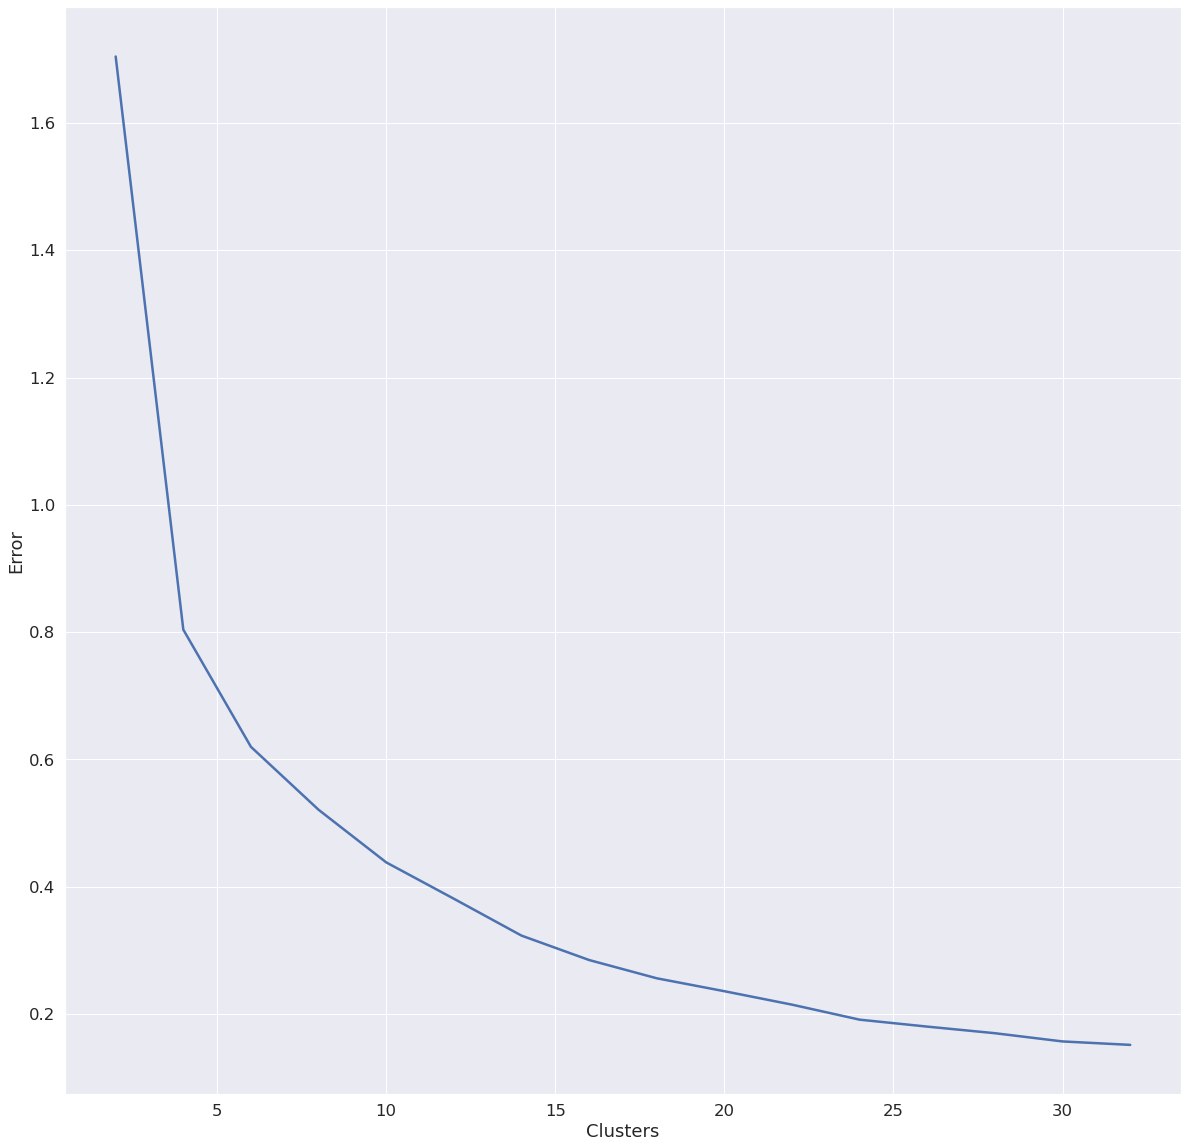

In [22]:
_ = _visualization.plot_cluster_errors(Ks,Js)

* It seems thare are too many columns, the number of clusters is almost the same of the number of samples

## Using a dendogram

We are using lastP as metric for the linkage method:

"The last p non-singleton formed in the linkage are the only non-leaf nodes in the linkage; they correspond to rows Z[n-p-2:end] in Z. All other non-singleton clusters are contracted into leaf nodes."

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

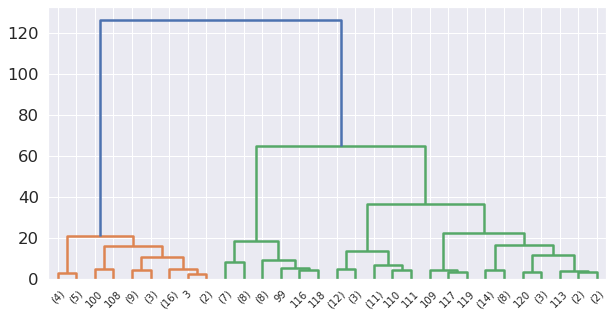

In [23]:
from importlib import reload
reload(_optimizer)
X_linked = _optimizer.linkage_cluster_dendogram(df_products_out)

In [24]:
clusters = _optimizer.fcluster_cut(df_products_out.values, max_d=2)
clusters.shape, len(np.unique(clusters))

((130,), 31)

In [25]:
df_products_out['hc_cluster'] = clusters

In [26]:
df_products_out[['kmeans_cluster', 'hc_cluster']].reset_index().groupby(['kmeans_cluster', 'hc_cluster']).count()

,,code
kmeans_cluster,hc_cluster,
0,11,8
1,13,1
2,12,8
3,10,7
4,14,1
5,15,1
6,19,1
7,18,11
8,20,1


In [27]:
df_products_out.drop(columns=['hc_cluster', 'kmeans_cluster']).to_csv('../data/products_features_exp2.csv')

/home/gorigan/anaconda3/envs/ml2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

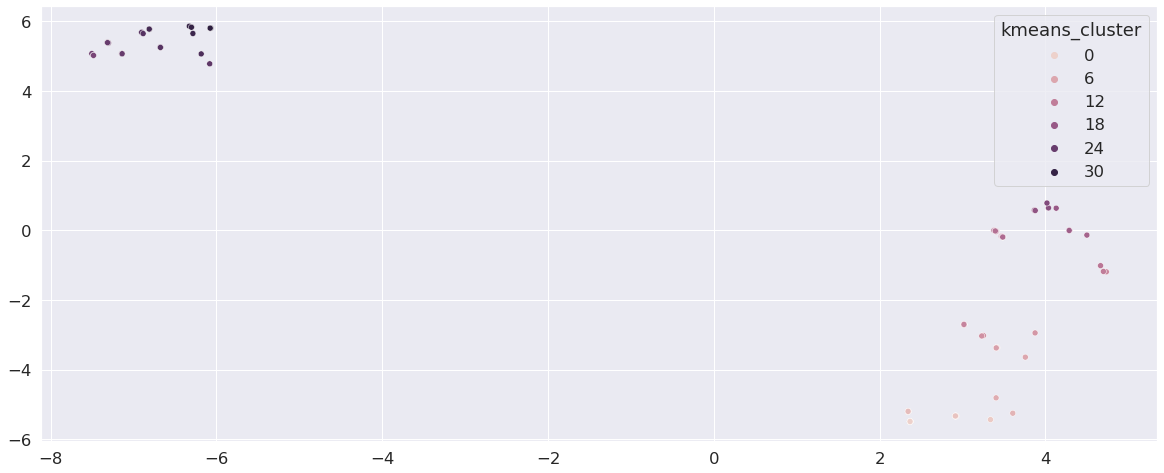

In [28]:
tsne_labels = _visualization.create_tsne_labels(df_products_out)
sns.scatterplot(tsne_labels[:,0], tsne_labels[:,1], hue=df_products_out['kmeans_cluster'])

/home/gorigan/anaconda3/envs/ml2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

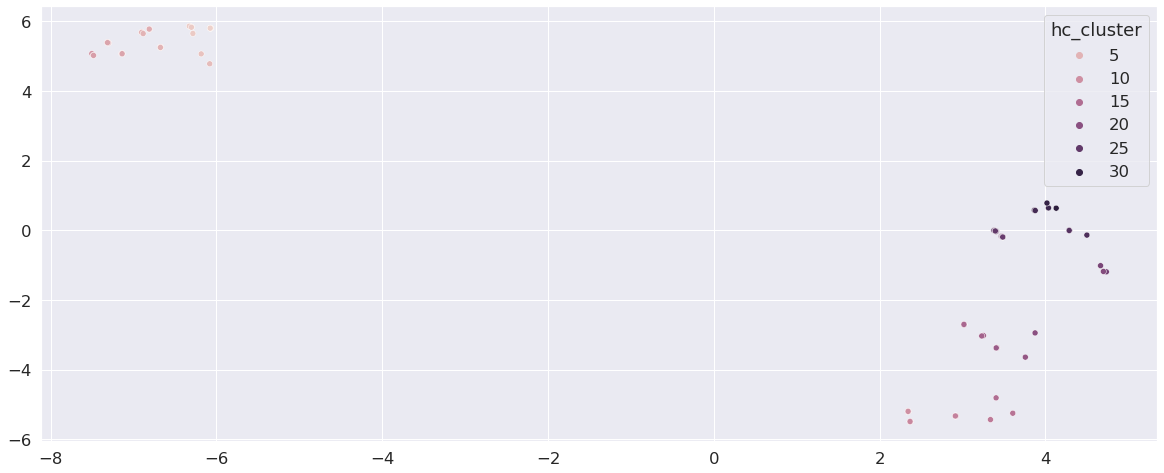

In [29]:
sns.scatterplot(tsne_labels[:,0], tsne_labels[:,1], hue=df_products_out['hc_cluster'])

## Metrics

In [30]:
_metrics.applyClusterMetrics(df_products_out,df_products_out.kmeans_cluster)

Davies Bouldin
0.21587816628126394

Calinski and Harabaz
3267.4400699053804

Silhouette Score
0.6513495119348249



In [31]:
_metrics.applyClusterMetrics(df_products_out,df_products_out.hc_cluster)

Davies Bouldin
0.22231140970740207

Calinski and Harabaz
3158.2122470332174

Silhouette Score
0.6527066943818467

